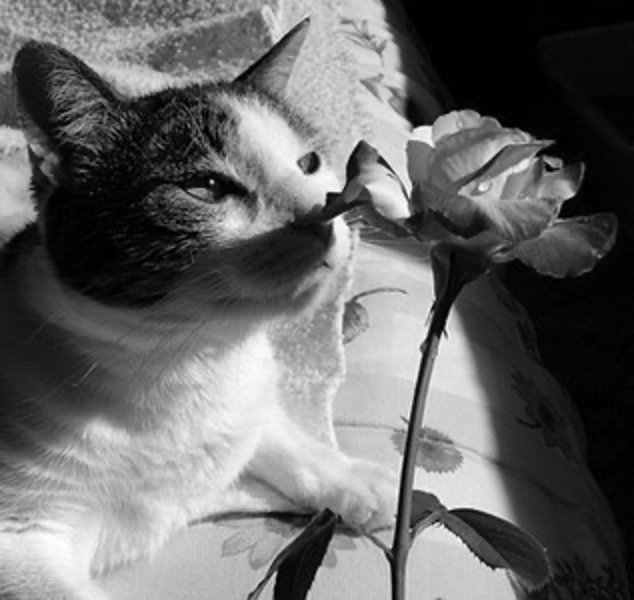

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv2.imread("item1.png", cv2.IMREAD_GRAYSCALE)

def printImg(*imgs):
    for img in imgs:
        print()
        cv2_imshow(img)

printImg(img1)

# 1) Codigo para convolução

In [12]:
def conv(img, kernel):
  img = img.astype(float)

  imgVect=[]
  kernel_x = len(kernel)//2
  kernel_y = len(kernel[0])//2
  for row in range(len(kernel)):
    for col in range(len(kernel[row])):                       #cria um vetor com as posições relativas ao pixel atual
      imgVect.append([col - kernel_x,row - kernel_y])

  # for i in range(len(kernel)):
  #   for j in range(len(kernel[i])):                           #função só p imprimir os valores do vetor de cima em formato de matriz
  #     print(imgVect[i*len(kernel[0])+j],end="")
  #   print()

  cuttedImg_kernelSize = []                                   #sera usado para armazenar m pixels adjacentes(conforme valor do kernel) para cada pixel n na imagem
                                                              #basicamente terá n vetores do tamanho do kernel, com cada elemento desse vetor sendo os pixels adjacentes
  for i in range(len(img)):
    for j in range(len(img[i])):                              #percorre a imagem inteira

      aroundPixels = []                                       #aqui criamos uma lista temporaria para que seja adicionado cada pixel adjacente para que depois fique mais facil adicionar o vetor inteiro diretamente em "cuttedImg_kernelSize"

      for element in imgVect:
        if i+element[1] >= 0 and i+element[1] < len(img) and j+element[0] >= 0 and j+element[0] < len(img[i]):  # element[0] = coluna do vetor de posições relativas
          aroundPixels.append(img[i+element[1]][j+element[0]])                                               # element[1] = linha do vetor de posições relativas
        else:                                                                                                   #basicamente,para cada elemento adjacente ao pixel img[i][j]
          aroundPixels.append(0.0)                                                                              #se estiver fora do range da imagem recebe valor 0 no resultado que fica em "cuttedImg_kernelSize"
                                                                                                                #se estiver dentro do range recebe seu proprio valor

      cuttedImg_kernelSize.append(aroundPixels)


  kernel_flat = kernel.flatten().tolist()   #transforma o kernel em um vetor com cada elemento da matriz "kernel" (para facilitar a multiplicação)

  # Aplica a convolução: multiplicando os valores de cada elemento do kenel por cada elemento de cada pixel da imagem(em "cuttedImg_kernelSize")
  result = np.zeros((img.shape[0], img.shape[1])) #apenas cria uma matriz de 0's do tamanho de imagem para atribuir os valores para cada pixel com kernel aplicado para que possa ser retornado como resultado
  idx = 0
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          # Multiplica elemento a elemento do kernel pelo atual vetor de "cuttedImg_kernelSize" e soma todos. Resultando no pixel com o kernel aplicado
          conv_value = sum([a*b for a,b in zip(cuttedImg_kernelSize[idx], kernel_flat)])
          result[i,j] = conv_value
          idx += 1

  result = np.clip(result, 0, 255)   # corta valores fora do range
  result = result.astype(np.uint8)   # converte de voltapra uint
  return result


1.R) Executa o codigo de convolução:

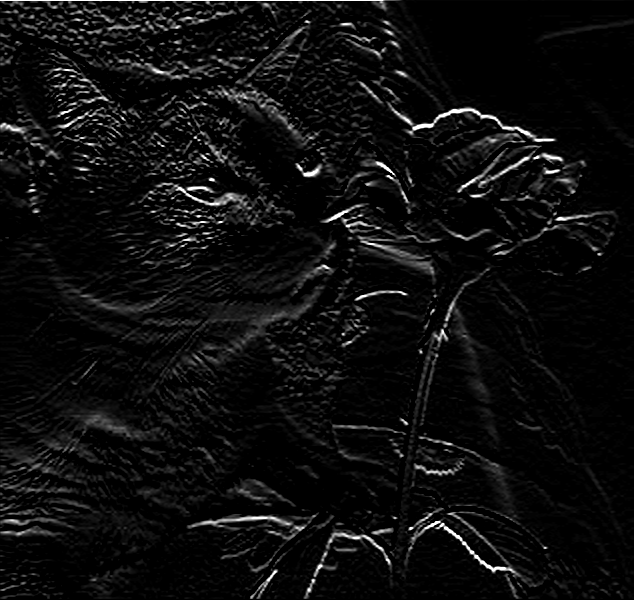

In [13]:
k = np.array([[-1,-2,-1],
              [0,0,0],
              [1,2,1]])

printImg(conv(img1,k))



---



# 2.1) Codigo de Mediana:

In [14]:
def median(img, kernel_x, kernel_y):
  img = img.astype(float)

  imgVect=[]
  indexX = kernel_x//2
  indexY = kernel_y//2
  for row in range(kernel_x):        # cria um vetor com as posições relativas ao pixel atual com base no tamanho x e y do kernel passado
    for col in range(kernel_y):
      imgVect.append([col - indexX,row - indexY])

  # for i in range(kernel_x):
  #   for j in range(kernel_y):
  #     print(imgVect[i*kernel_x+j],end="")
  #   print()

#                     vvvvvv aqui o codigo é identico ao da convolução
  medianPixel = []
  for i in range(len(img)):
    for j in range(len(img[i])):

      aroundPixels = []

      for element in imgVect:
        if i+element[1] >= 0 and i+element[1] < len(img) and j+element[0] >= 0 and j+element[0] < len(img[i]):
          aroundPixels.append(img[i+element[1]][j+element[0]])
        else:
          aroundPixels.append(0.0)

#                     ^^^^^^ aqui o codigo é identico ao da convolução

      aroundPixels.sort()                                     # pega o vetor de pixels adjacentes á img[i][j] e ordena
      aroundPixels = aroundPixels[len(aroundPixels)//2]       # pega o valor mediano desse vetor e reutiliza a mesma variavel arounPixels(que antes era vetor, agora é apenas 1 valor)
      medianPixel.append(aroundPixels)                        # guarda o valor em mediano das adjacencias de cada pixel em medianPixel

  result = np.zeros((img.shape[0], img.shape[1]))

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):                           # atribui o valor mediano de cada pixel no index correspondente do resultado.
          result[i,j] = medianPixel[i*img.shape[1]+j]         #   como median pixel é um vetor unidimensional do tamanho dos pixels da imagem, basta usar a formula "i*img.shape[1]+j" para obter o index de "[i][j]" de uma matriz

  result = result.astype(np.uint8)
  return result



2.1.R) Executa o codigo de mediana:

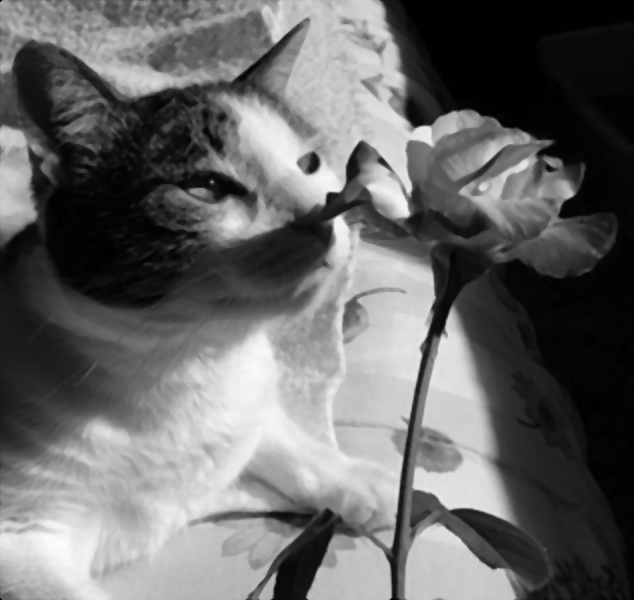

In [15]:
printImg(median(img1,5,5))

# 2.2) Codigo de Max:

In [16]:
def max(img, kernel_x, kernel_y):
  img = img.astype(float)

  imgVect=[]
  indexX = kernel_x//2
  indexY = kernel_y//2
  for row in range(kernel_x):
    for col in range(kernel_y):
      imgVect.append([col - indexX,row - indexY])

  # for i in range(kernel_x):
  #   for j in range(kernel_y):
  #     print(imgVect[i*kernel_x+j],end="")
  #   print()

  maxPixel = []
  for i in range(len(img)):
    for j in range(len(img[i])):

      aroundPixels = []

      for element in imgVect:
        if i+element[1] >= 0 and i+element[1] < len(img) and j+element[0] >= 0 and j+element[0] < len(img[i]):
          aroundPixels.append(img[i+element[1]][j+element[0]])
        else:
          aroundPixels.append(0.0)

                                                          #mesmo codigo da mediana, unica diferença é que nessa parte em vez de pegar o valor mediano, pega o valor maximo
      aroundPixels = np.array(aroundPixels).max()         # transforma em np.array para utilizar a função max() e achar o maior pixel adjacente
                                                          #     (mas tambem pode ser feito da maneira como está comentado abaixo)

      # aroundPixels.sort()
      # aroundPixels = aroundPixels[len(aroundPixels)-1]    #pega o ultimo pixel do vetor ordenado

      maxPixel.append(aroundPixels)

  result = np.zeros((img.shape[0], img.shape[1]))

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i,j] = maxPixel[i*img.shape[1]+j]

  result = result.astype(np.uint8)
  return result



2.2.R) Executa o codigo de maximo:

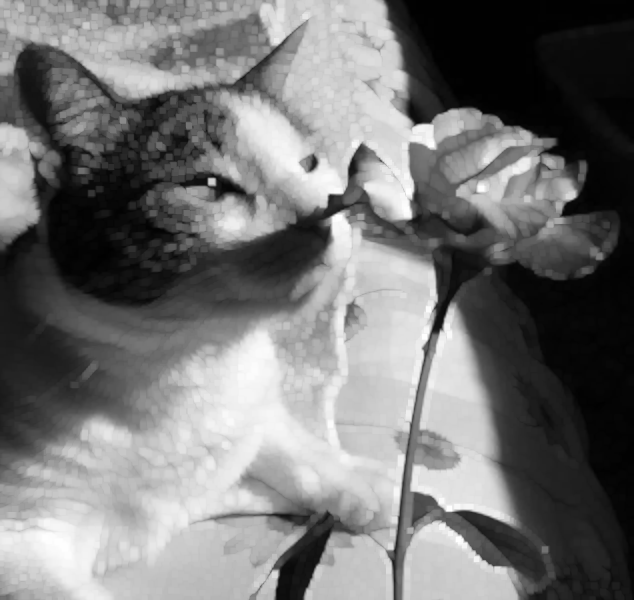

In [17]:
printImg(max(img1,5,5))

# 2.3) Codigo de Min:

In [18]:
def min(img, kernel_x, kernel_y):
  img = img.astype(float)

  imgVect=[]
  indexX = kernel_x//2
  indexY = kernel_y//2
  for row in range(kernel_x):
    for col in range(kernel_y):
      imgVect.append([col - indexX,row - indexY])

  # for i in range(kernel_x):
  #   for j in range(kernel_y):
  #     print(imgVect[i*kernel_x+j],end="")
  #   print()

  minPixel = []
  for i in range(len(img)):
    for j in range(len(img[i])):

      aroundPixels = []

      for element in imgVect:
        if i+element[1] >= 0 and i+element[1] < len(img) and j+element[0] >= 0 and j+element[0] < len(img[i]):
          aroundPixels.append(img[i+element[1]][j+element[0]])
        else:
          aroundPixels.append(0.0)

                                                          #mesmo codigo da mediana, unica diferença é que nessa parte em vez de pegar o valor mediano, pega o valor minimo
      aroundPixels = np.array(aroundPixels).min()         # transforma em np.array para utilizar a função min() e achar o menor pixel adjacente
                                                          #     (mas tambem pode ser feito da maneira como está comentado abaixo)

      # aroundPixels.sort()
      # aroundPixels = aroundPixels[0]                    #pega o ultimo pixel do vetor ordenado

      minPixel.append(aroundPixels)

  result = np.zeros((img.shape[0], img.shape[1]))

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i,j] = minPixel[i*img.shape[1]+j]

  result = result.astype(np.uint8)
  return result



2.3.R) Executa o codigo de minimo:

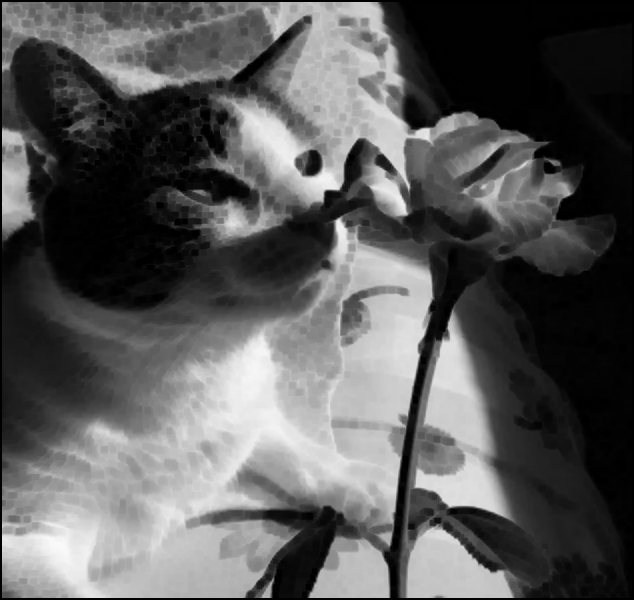

In [19]:
printImg(min(img1,5,5))

# 2.3) Codigo de Ponto Médio:

In [20]:
def pontoMedio(img, kernel_x, kernel_y):
  img = img.astype(float)

  imgVect=[]
  indexX = kernel_x//2
  indexY = kernel_y//2
  for row in range(kernel_x):
    for col in range(kernel_y):
      imgVect.append([col - indexX,row - indexY])

  # for i in range(kernel_x):
  #   for j in range(kernel_y):
  #     print(imgVect[i*kernel_x+j],end="")
  #   print()

  pontoMedioPixel = []
  for i in range(len(img)):
    for j in range(len(img[i])):

      aroundPixels = []

      for element in imgVect:
        if i+element[1] >= 0 and i+element[1] < len(img) and j+element[0] >= 0 and j+element[0] < len(img[i]):
          aroundPixels.append(img[i+element[1]][j+element[0]])
        else:
          aroundPixels.append(0.0)


      min = np.array(aroundPixels).min()         # calcula o valor minimo dos adjacentes
      max = np.array(aroundPixels).max()         # calcula o valor maximo dos adjacentes

      aroundPixels = (min+max)//2                #soma e divide por 2 (numeros inteiros como resultado)

      pontoMedioPixel.append(aroundPixels)

  result = np.zeros((img.shape[0], img.shape[1]))

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i,j] = pontoMedioPixel[i*img.shape[1]+j]

  result = result.astype(np.uint8)
  return result



2.4.R) Executa o codigo de ponto médio:

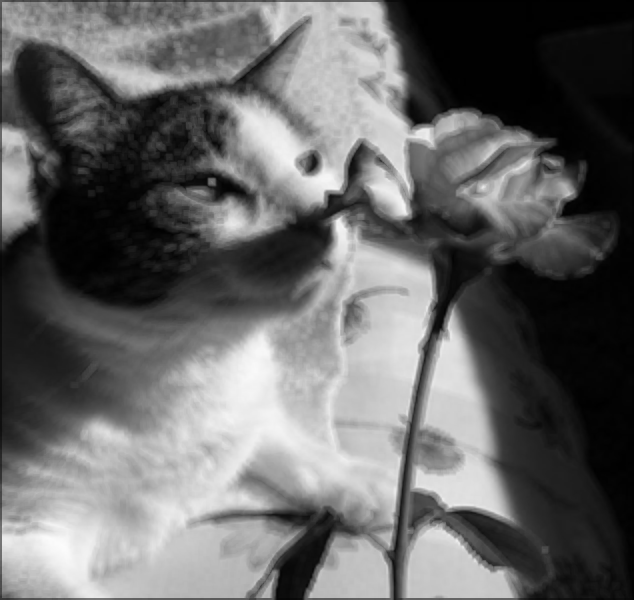

In [21]:
printImg(pontoMedio(img1,5,5))



---



# 3) Aplicar filtro de Media e Mediana

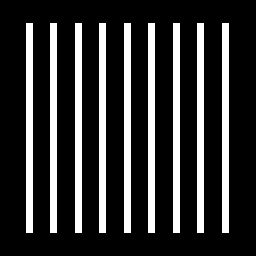

In [22]:
img2 = cv2.imread("item2.jpg", cv2.IMREAD_GRAYSCALE)

k3x3 = np.ones((3,3), dtype=float) / 9
k7x7 = np.ones((7,7), dtype=float) / 49
k9x9 = np.ones((9,9), dtype=float) / 81

printImg(img2)

3.a) Filtro de média

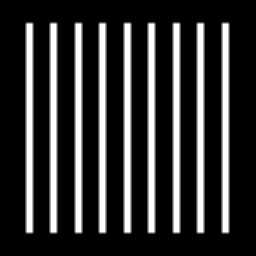

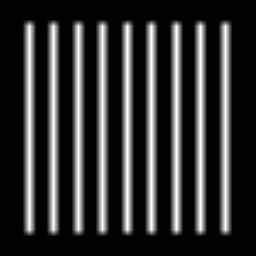

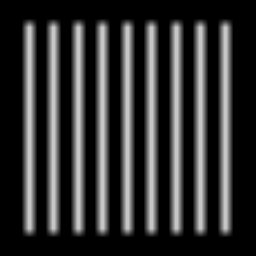

In [23]:
imgOne3x3= conv(img2,k3x3)
imgOne7x7 = conv(img2,k7x7)
imgOne9x9 = conv(img2,k9x9)

printImg(imgOne3x3,imgOne7x7,imgOne9x9)

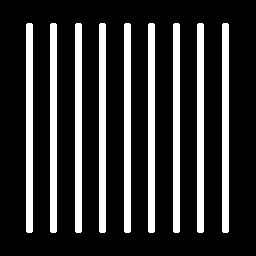

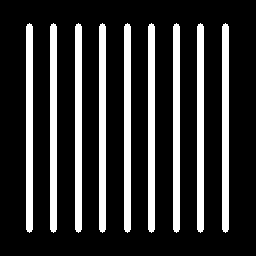

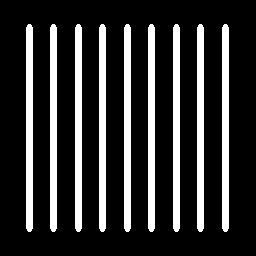

In [24]:
imgTwo3x3= median(img2,3,3)
imgTwo7x7 = median(img2,7,7)
imgTwo9x9 = median(img2,9,9)

printImg(imgTwo3x3,imgTwo7x7,imgTwo9x9)

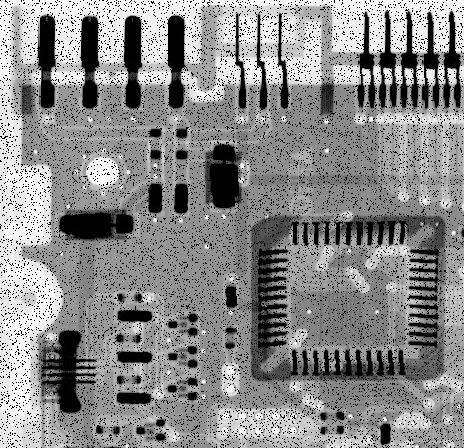

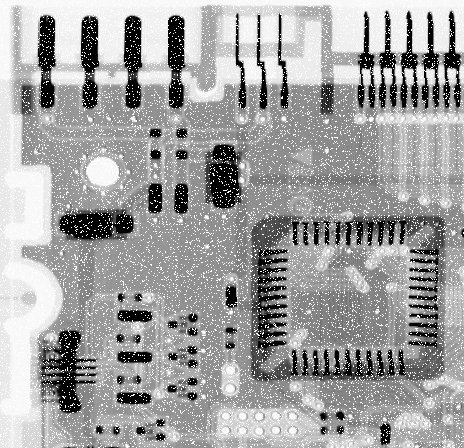

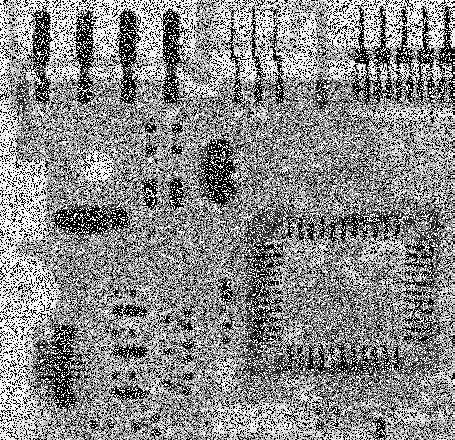

In [25]:
img3 = cv2.imread("item3.1.jpg", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("item3.2.jpg", cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread("item3.3.jpg", cv2.IMREAD_GRAYSCALE)

printImg(img3,img4,img5)

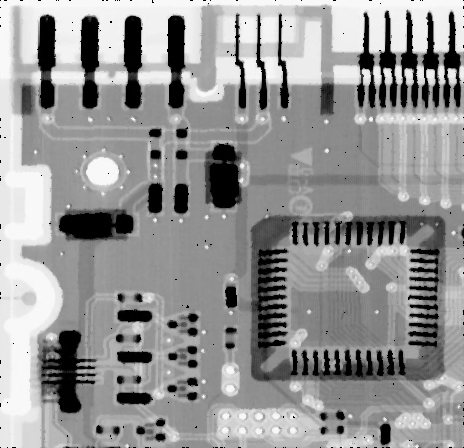

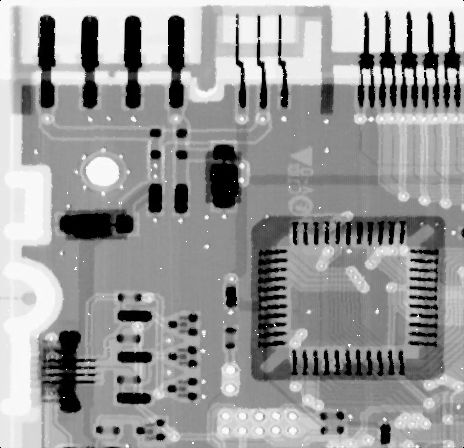

In [26]:
#mediana é bem apta para remover ruidos sal e pimenta. Por isso essa foi a convolução escolhida:
printImg(median(img3,3,3),median(img4,3,3))

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]



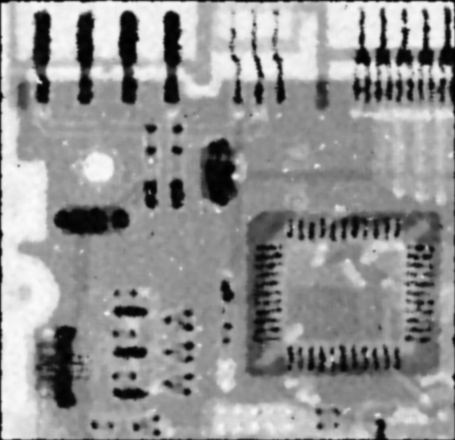

In [27]:
#função:  gaussiana (neutraliza ruidos para um estagio mais suave) + mediana (remove o "grosso" do ruido)

def gauss(x, y, sigma):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

def kernel_gauss(size, sigma):
    kernel = np.ones((size, size))
    for i in range(size):
        for j in range(size):
            kernel[i, j] = gauss(i - size // 2, j - size // 2, sigma)
    return kernel / np.sum(kernel)

print(kernel_gauss(5,1))
printImg(conv(median(img5,6,6),gaussian_kernel))